In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import joblib

In [2]:
#Goal: WHo is going to survive given the information about passengar?
#Explore our data
rawdata=pd.read_csv("C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic.csv")

In [3]:
rawdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
rawdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#categorical vs continuous data?
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
rawdata.shape

(891, 12)

In [7]:
#select categorical feature
cat=['PassengerId','Name','Embarked','Cabin','Sex','Ticket']

In [8]:
rawdata.drop(cat,inplace=True,axis=1)

In [9]:
rawdata

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [10]:
rawdata.describe() # There are missing values in age

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
rawdata.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
#Fare and PClass may be a good predictor. Fare and Pclass are highly negatively correlated. That's understandable coz high fairclass means low Pclass (1)

In [13]:
#Why Parch and SibSp are correlated ?  i need to know about them

In [14]:
#Let's analyze Age variable
rawdata["Age"].isnull().sum() ## 177 missing value

177

In [15]:
#Average age of survived vs average age of non-survived ?
print(rawdata[rawdata["Survived"]==1]["Age"].mean())
print(rawdata[rawdata["Survived"]==0]["Age"].mean())

28.343689655172415
30.62617924528302


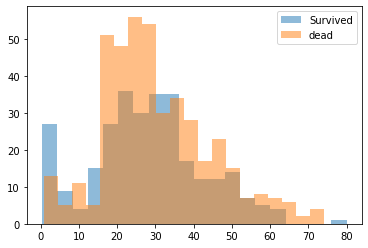

In [16]:
plt.hist(rawdata[rawdata["Survived"]==1]["Age"],bins=20,alpha=0.5)
plt.hist(rawdata[rawdata["Survived"]==0]["Age"],bins=20,alpha=0.5)
plt.legend(['Survived',"dead"])
plt.show()
#I don't see an apparent difference in distribution of survived vs non-survived people age distribution

In [17]:
#Q: Let's look at the relation between fare and Pclass
rawdata.groupby(["Pclass"])["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [18]:
#Good chance we might throw out 1 of them!
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(rawdata.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = rawdata[rawdata['Survived']==1][feature]
    not_survived = rawdata[rawdata['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [19]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

In [20]:
#Fare and P class both are significant as indicated from t test 
#Age has some missing values. Are they missing in random or having a pattern. Let's check it

In [21]:
rawdata.groupby(rawdata['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [22]:
#Well, survival rate decrease when there are missing values in Age, fare is less when there are missing, it might mean
#people who has missing age value are mostly from lower class cebins, that make sense for why they have lower survival rate,
#rich people might have a higher survival rate as already evident

# Plot Continuous features

C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


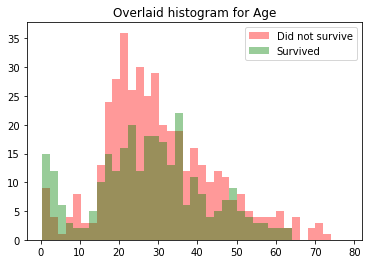

C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


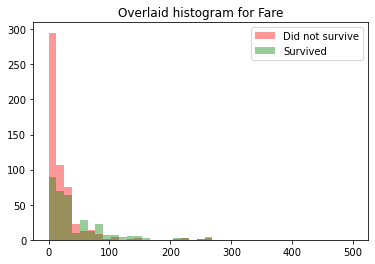

In [23]:
# Plot overlaid histograms for continuous features
for i in ['Age', 'Fare']:
    died = list(rawdata[rawdata['Survived'] == 0][i].dropna())
    survived = list(rawdata[rawdata['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

In [24]:
#No apparent difference between survived and dead in Age and Fare. Though there was a drastic diffference of fare between
# survived and dead, we can see they look almost same, average of survived are impacted by some outliers

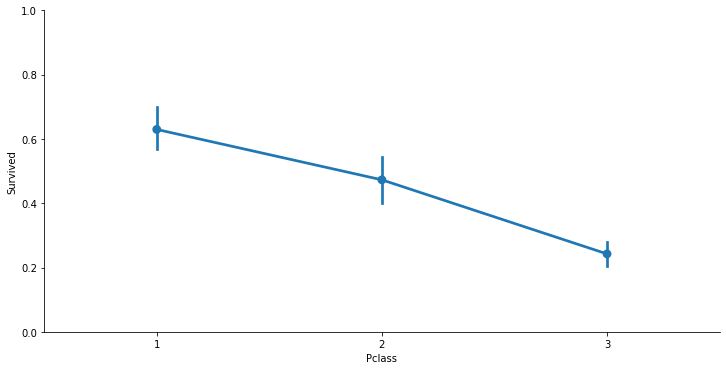

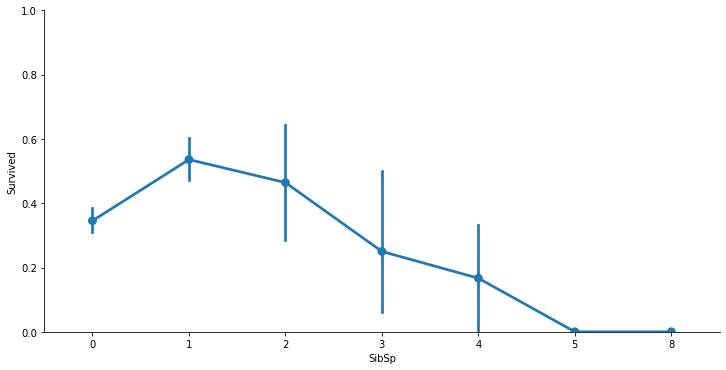

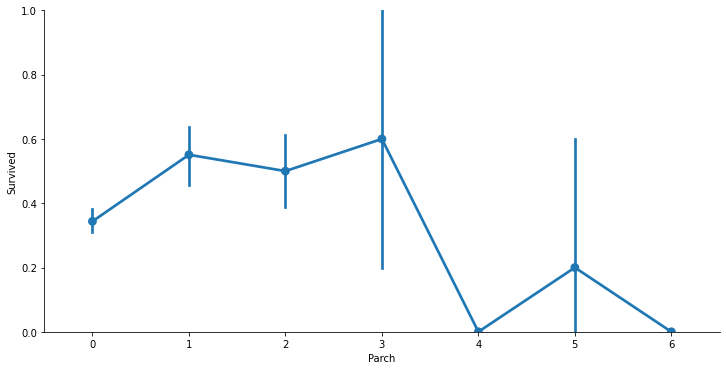

In [25]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=rawdata, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [26]:
# Create a new family count feature
rawdata["family_count"]=rawdata["SibSp"]+rawdata["Parch"]

(0.0, 1.0)

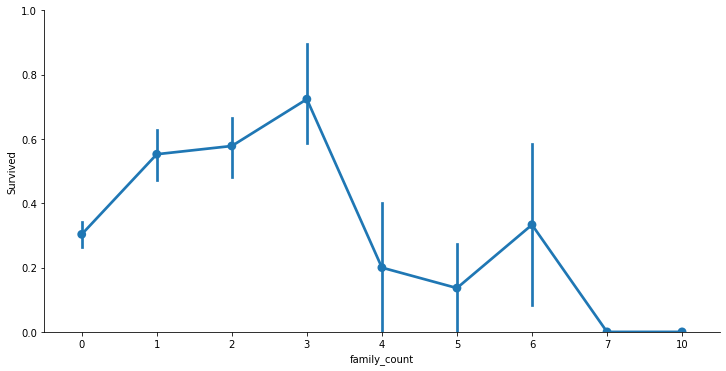

In [27]:
sns.catplot(x="family_count", y='Survived', data=rawdata, kind='point', aspect=2, )
plt.ylim(0, 1)

In [28]:
#explore categorical variables
titanic=pd.read_csv("C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic.csv")

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [31]:
# Check if there are any missing values. Cabin has 687 missing values
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [32]:
# Explore the number of unique values for each feature
for col in titanic.columns:
    print('{}: {} unique values'.format(col, titanic[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [33]:
# Check survival rate by gender # femalse has much higher survival rate than male!
titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
# Check survival rate by the port departed from
titanic.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [35]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [36]:
#The difference is tremendous. We will define an indicator variable whether person has a cabin or not
pd.set_option('display.max_rows', 200)
titanic['Cabin'].head(200)

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
30             NaN
31             B78
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37             NaN
38             NaN
39             NaN
40             NaN
41             NaN
42             NaN
43             NaN
44             NaN
45             NaN
46             NaN
47             NaN
48             NaN
49             NaN
50             NaN
51             NaN
52          

In [37]:
# Look at unique values for the Ticket feature
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
347076      1
2649        1
349208      1
111240      1
2662        1
Name: Ticket, Length: 681, dtype: int64

In [38]:
#seems random. will drop it probably

In [39]:
#explore name
titanic['Name'].head(80)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [40]:
titanic['title']=titanic['Name'].apply(lambda x: x.split(",")[1].split(".")[0])

In [41]:
pd.set_option('display.max_rows', None)
titanic['title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Capt              1
 Lady              1
 Ms                1
 Don               1
 Mme               1
 Jonkheer          1
 the Countess      1
Name: title, dtype: int64

In [42]:
titanic.pivot_table('Survived', index=['title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                     Survived  Survived
title         Sex                      
 Capt         male          1  0.000000
 Col          male          2  0.500000
 Don          male          1  0.000000
 Dr           female        1  1.000000
              male          6  0.333333
 Jonkheer     male          1  0.000000
 Lady         female        1  1.000000
 Major        male          2  0.500000
 Master       male         40  0.575000
 Miss         female      182  0.697802
 Mlle         female        2  1.000000
 Mme          female        1  1.000000
 Mr           male        517  0.156673
 Mrs          female      125  0.792000
 Ms           female        1  1.000000
 Rev          male          6  0.000000
 Sir          male          1  1.000000
 the Countess female        1  1.000000

In [43]:
#Plot categorical features

In [44]:
titanic=pd.read_csv("C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic.csv",usecols=['Survived', 'Name', 'Sex', 'Cabin', 'Embarked'])

In [45]:
titanic.head()

,Survived,Name,Sex,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,1,"Heikkinen, Miss. Laina",female,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,0,"Allen, Mr. William Henry",male,NaN,S


In [46]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
titanic['Title_Raw'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Name,Sex,Cabin,Embarked,Title_Raw,Title,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,NaN,S,Mr,Mr,0


In [47]:
titanic.groupby('Cabin_ind')['Survived'].mean()

Cabin_ind
0    0.299854
1    0.666667
Name: Survived, dtype: float64

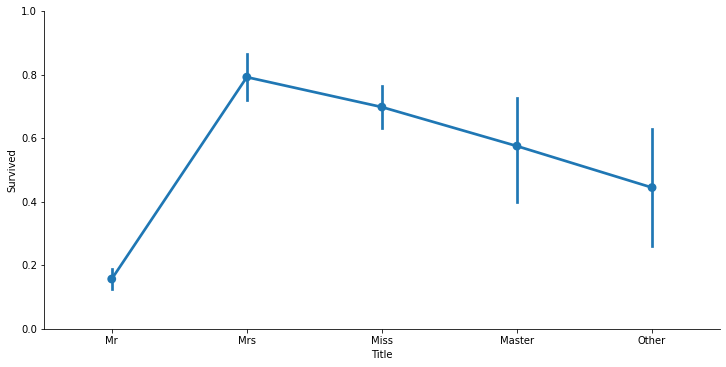

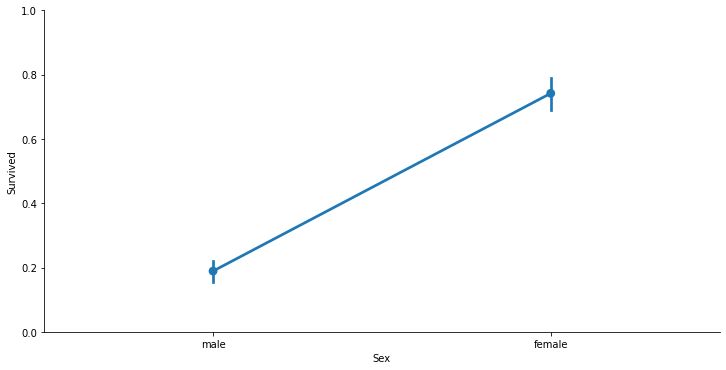

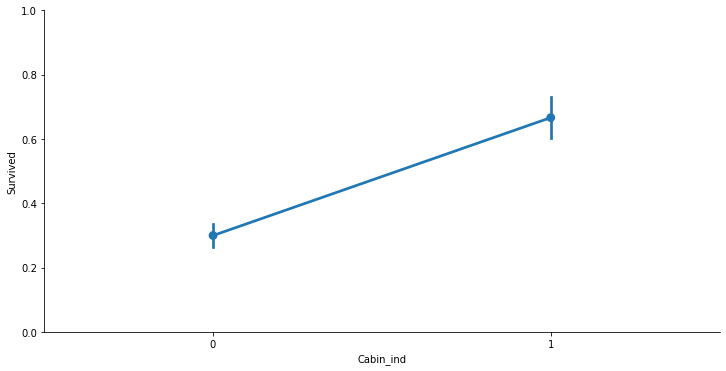

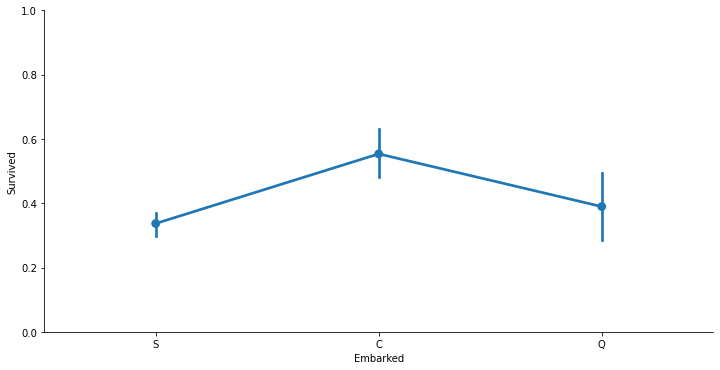

In [48]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [49]:
# Split embarked by whether the passenger had a cabin
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [50]:
#Cleaning and creating new features
titanic =pd.read_csv("C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
# Check if Age appears to be missing at random
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [53]:
# Fill in missing values for the Age feature
titanic['Age_clean'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

In [54]:
# Fill in missing values for the Embarked feature
titanic['Embarked_clean'] = titanic['Embarked'].fillna('O')
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S


In [56]:
# Write out data with missing values cleaned up
titanic.to_csv("C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_no_missing.csv", index=False)

In [57]:
#capping and flooring to remove outliers
#load the data
titanic=pd.read_csv("C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_no_missing.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S


In [58]:
# See where outliers might be an issue
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_clean'>

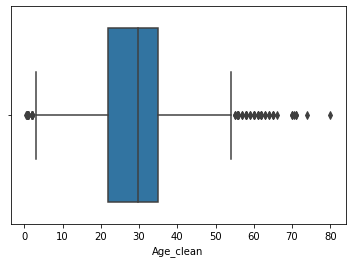

In [59]:
sns.boxplot("Age_clean",data=titanic)

C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

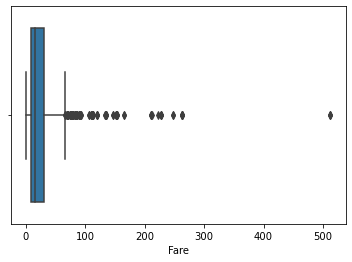

In [60]:
sns.boxplot("Fare",data=titanic)

C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

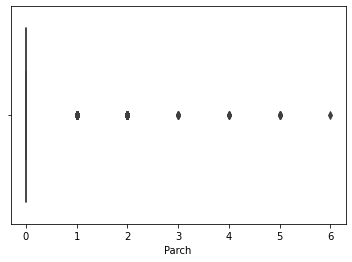

In [61]:
sns.boxplot("Parch",data=titanic)

C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

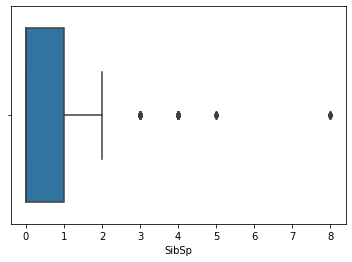

In [62]:
sns.boxplot("SibSp",data=titanic)

In [63]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [64]:
np.mean(titanic["Age_clean"])

29.699117647058763

In [65]:
# Determine what the upperbound should be for continuous features
for feat in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
    detect_outlier(feat)


Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 7 values exceed that
  --99p: 65.0 / 8 values exceed that

Outlier caps for SibSp:
  --95p: 3.0 / 30 values exceed that
  --3sd: 3.8 / 30 values exceed that
  --99p: 5.0 / 7 values exceed that

Outlier caps for Parch:
  --95p: 2.0 / 15 values exceed that
  --3sd: 2.8 / 15 values exceed that
  --99p: 4.0 / 6 values exceed that

Outlier caps for Fare:
  --95p: 112.1 / 45 values exceed that
  --3sd: 181.2 / 20 values exceed that
  --99p: 249.0 / 9 values exceed that


In [66]:
# Cap features
titanic['Age_clean'].clip(upper=titanic['Age_clean'].quantile(.99), inplace=True)
titanic['Fare_clean'] = titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99))

In [67]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [68]:
# Write out capped data
titanic.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_capped.csv', index=False)

In [69]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

C:\Users\Salehin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


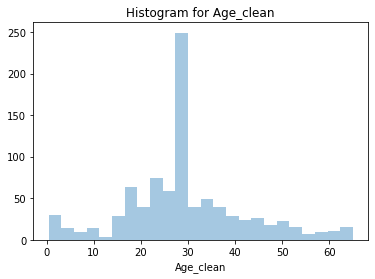

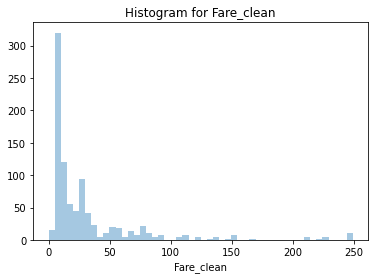

In [70]:
for feature in ['Age_clean', 'Fare_clean']:
    sns.distplot(titanic[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

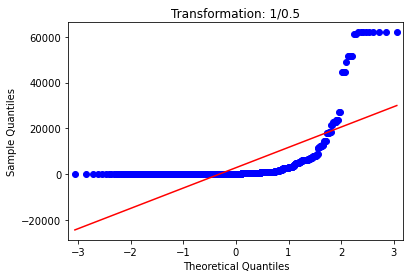

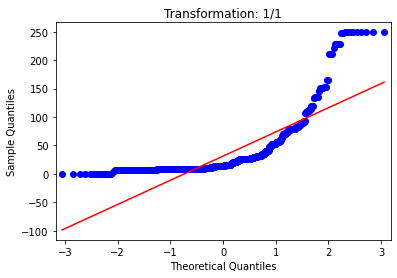

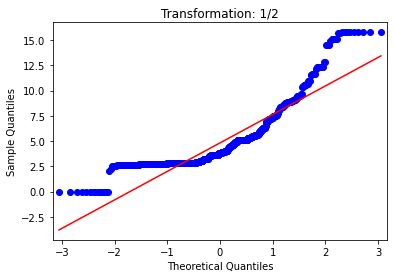

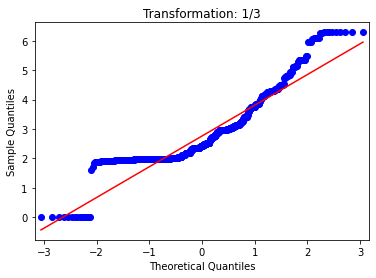

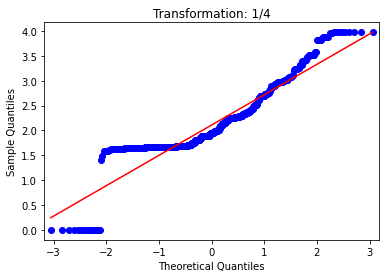

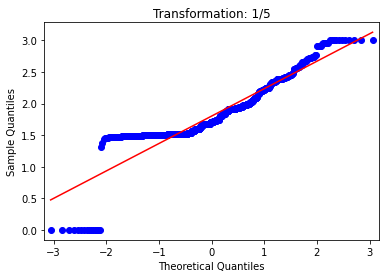

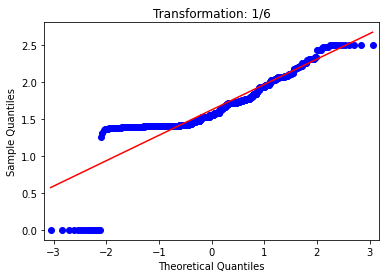

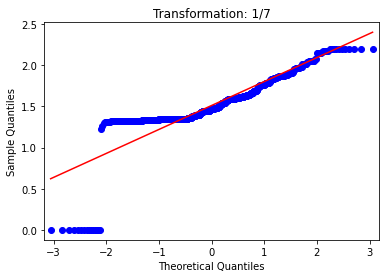

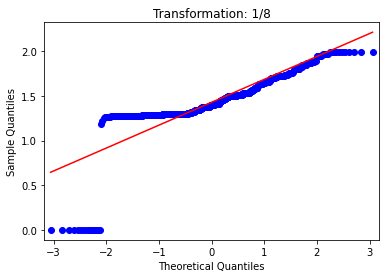

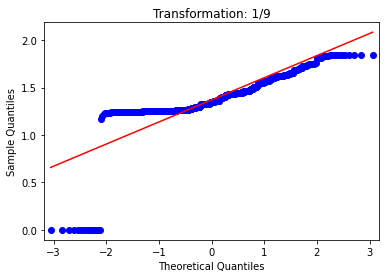

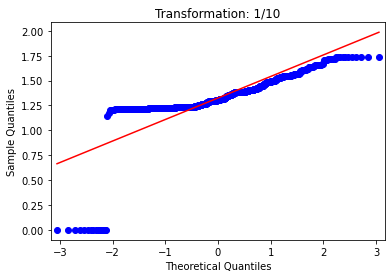

In [71]:
#Fare_clean data looks highly skewed. Let's apply transformations
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

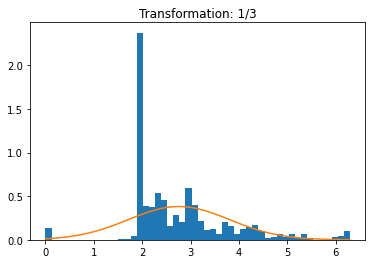

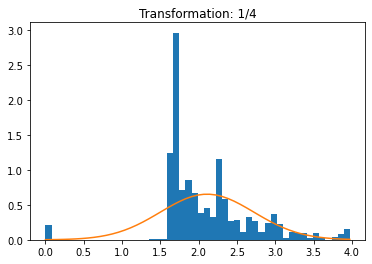

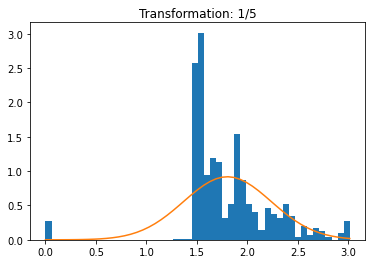

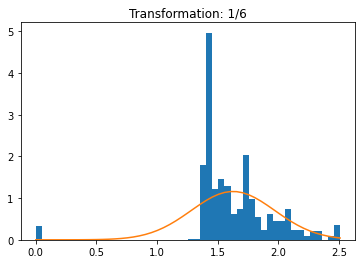

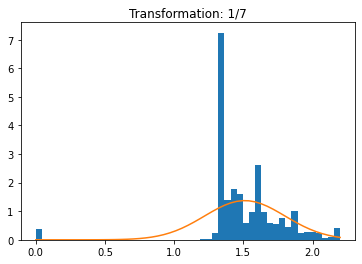

In [72]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = titanic['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [73]:
#1/5 looks a reasonable transformation
# Create the new transformed feature
titanic['Fare_clean_tr'] = titanic['Fare_clean'].apply(lambda x: x**(1/5))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [74]:
# Create new CSV with updated data
titanic.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_transformed.csv', index=False)

In [75]:
titanic = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_transformed.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [76]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


In [77]:
# Look at survival rate by title
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [78]:
# Create new CSV with updated data
titanic.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_new_title.csv', index=False)

In [79]:
titanic = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_new_title.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


In [80]:
# What would an indicator variable for Cabin look like?
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [81]:
# Create indicator feature
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [82]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


In [83]:
# Create new CSV with updated data
titanic.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_new_ind.csv', index=False)

(0.0, 1.0)

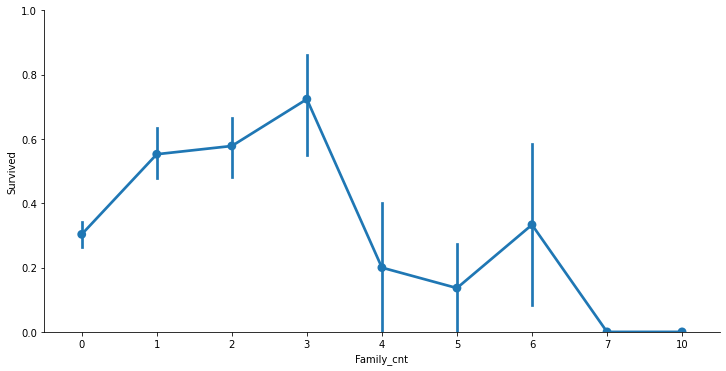

In [84]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

In [85]:
# Create new CSV with updated data
titanic.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_family_cnt.csv', index=False)

In [86]:
titanic = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_family_cnt.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0,0


In [87]:
from sklearn.preprocessing import LabelEncoder


In [88]:
# Convert categorical features to numeric levels
for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']:
    le = LabelEncoder()
    titanic[feature] = le.fit_transform(titanic[feature].astype(str))
    
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [89]:
titanic.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data/titanic_numeric.csv')

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Drop unnecccessary features and split into training/test sets
features = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [92]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [93]:
X_train.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features.csv', index=False)
X_val.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features.csv', index=False)
X_test.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features.csv', index=False)

y_train.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_labels.csv', index=False)
y_val.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_labels.csv', index=False)
y_test.to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_labels.csv', index=False)

In [94]:
from sklearn.preprocessing import StandardScaler


In [95]:
titanic_train = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features.csv')
titanic_val = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features.csv')
titanic_test = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features.csv')
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [96]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(titanic_train)

StandardScaler()

In [97]:
# Scale the training, test, and validation sets
features = titanic_train.columns

titanic_train[features] = scaler.transform(titanic_train[features])
titanic_val[features] = scaler.transform(titanic_val[features])
titanic_test[features] = scaler.transform(titanic_test[features])

titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,-0.408652,0.737125,2.258185,-0.464063,-0.468427,-0.412724,0.450064,0.573494,2.570771,0.545364,-0.483840,-0.446199,0.430223,-0.544166,-0.540385
1,0.803682,0.737125,-1.469145,2.692745,0.794906,-0.066661,0.450064,-0.718682,-1.673694,-0.334468,-0.046993,0.373863,-1.784129,-0.544166,2.277639
2,0.803682,0.737125,0.187446,-0.464063,-0.468427,0.441904,0.450064,0.573494,0.212735,0.545364,0.594986,1.003414,0.430223,-0.544166,-0.540385
3,0.803682,-1.356623,-0.640849,0.325139,-0.468427,-0.425266,0.450064,0.573494,-0.730480,0.545364,-0.499672,-0.494025,-1.230541,-0.544166,0.023220
4,-0.408652,-1.356623,-0.088652,-0.464063,-0.468427,-0.366273,0.450064,0.573494,-0.101670,0.545364,-0.425203,-0.288093,-1.230541,-0.544166,-0.540385


In [98]:
# Define the list of features to be used for each dataset
raw_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare',
                         'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean',
                             'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Fare_clean_tr',
                'Cabin', 'Cabin_ind', 'Embarked_clean', 'Title', 'Family_cnt']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_cnt', 'Fare_clean_tr',
                    'Cabin_ind', 'Title']

In [99]:
# Write out final data for each feature set
titanic_train[raw_original_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_raw.csv', index=False)
titanic_val[raw_original_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_raw.csv', index=False)
titanic_test[raw_original_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features_raw.csv', index=False)

titanic_train[cleaned_original_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_original.csv', index=False)
titanic_val[cleaned_original_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_original.csv', index=False)
titanic_test[cleaned_original_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features_original.csv', index=False)

titanic_train[all_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_all.csv', index=False)
titanic_val[all_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_all.csv', index=False)
titanic_test[all_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features_all.csv', index=False)

titanic_train[reduced_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_reduced.csv', index=False)
titanic_val[reduced_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_reduced.csv', index=False)
titanic_test[reduced_features].to_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features_reduced.csv', index=False)

In [100]:
# Read in all labels
titanic_train_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_labels.csv')
titanic_val_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_labels.csv')
titanic_test_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_labels.csv')

In [101]:
# Double-check the labels
titanic_train_labels

,Survived
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [104]:
train_features = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_raw.csv')
train_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_labels.csv')


In [105]:
train_features

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.412724,0.450064,0.573494
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.066661,0.450064,-0.718682
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.441904,0.450064,0.573494
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.425266,0.450064,0.573494
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.366273,0.450064,0.573494
5,0.803682,-1.356623,-0.651879,-0.464063,-0.468427,-0.463821,0.450064,-0.718682
6,0.803682,0.737125,0.605741,1.114341,-0.468427,-0.460569,0.450064,0.573494
7,0.803682,-1.356623,-0.966284,-0.464063,-0.468427,-0.339177,0.450064,-2.010857
8,0.803682,-1.356623,0.031883,-0.464063,-0.468427,-0.463821,0.450064,-0.718682
9,-1.620987,0.737125,1.313152,0.325139,-0.468427,0.528846,-0.242462,0.573494


<AxesSubplot:>

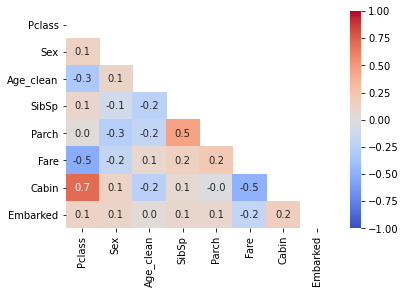

In [106]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [107]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [108]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.757 (+/-0.122) for {'max_depth': 2, 'n_estimators': 8}
0.781 (+/-0.134) for {'max_depth': 2, 'n_estimators': 16}
0.796 (+/-0.08) for {'max_depth': 2, 'n_estimators': 32}
0.796 (+/-0.09) for {'max_depth': 2, 'n_estimators': 64}
0.79 (+/-0.099) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.111) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.106) for {'max_depth': 2, 'n_estimators': 512}
0.792 (+/-0.079) for {'max_depth': 4, 'n_estimators': 8}
0.817 (+/-0.049) for {'max_depth': 4, 'n_estimators': 16}
0.809 (+/-0.117) for {'max_depth': 4, 'n_estimators': 32}
0.817 (+/-0.11) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.115) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.102) for {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-0.103) for {'max_depth': 4, 'n_estimators': 512}
0.83 (+/-0.074) for {'max_depth': 8, 'n_estimators': 8}
0.83 (+/-0.075) for {'max_depth': 8, 'n_estimators': 16}
0.826 (+/-0.058) for {'m

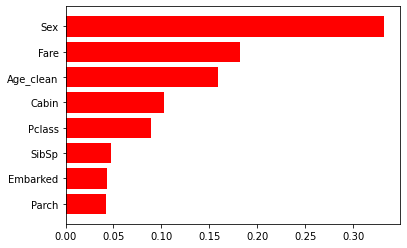

In [109]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [112]:
#We see sex is the strongest predictor
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_raw_original_features.pkl')

['C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_raw_original_features.pkl']

In [115]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=512)

In [114]:
import pickle


with open('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_raw_original_features.pkl', 'rb') as f:
    data = pickle.load(f)

UnpicklingError: invalid load key, '\x00'.

In [116]:
train_features = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_original.csv')
train_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_labels.csv')

In [117]:
train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,0.450064,0.545364
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.450064,-0.334468
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,0.450064,0.545364
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,0.450064,0.545364
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,0.450064,0.545364


<AxesSubplot:>

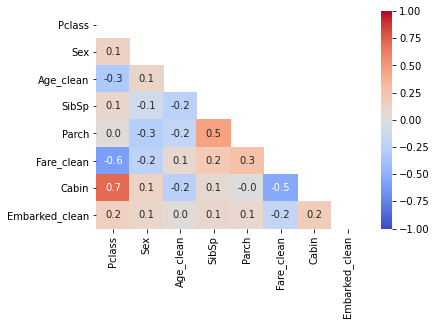

In [118]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [119]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [120]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 256}

0.787 (+/-0.119) for {'max_depth': 2, 'n_estimators': 8}
0.796 (+/-0.065) for {'max_depth': 2, 'n_estimators': 16}
0.781 (+/-0.08) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.106) for {'max_depth': 2, 'n_estimators': 64}
0.802 (+/-0.084) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.111) for {'max_depth': 2, 'n_estimators': 256}
0.79 (+/-0.107) for {'max_depth': 2, 'n_estimators': 512}
0.811 (+/-0.102) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.105) for {'max_depth': 4, 'n_estimators': 16}
0.835 (+/-0.087) for {'max_depth': 4, 'n_estimators': 32}
0.815 (+/-0.139) for {'max_depth': 4, 'n_estimators': 64}
0.817 (+/-0.118) for {'max_depth': 4, 'n_estimators': 128}
0.82 (+/-0.11) for {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-0.109) for {'max_depth': 4, 'n_estimators': 512}
0.813 (+/-0.086) for {'max_depth': 8, 'n_estimators': 8}
0.824 (+/-0.056) for {'max_depth': 8, 'n_estimators': 16}
0.833 (+/-0.065) for {'

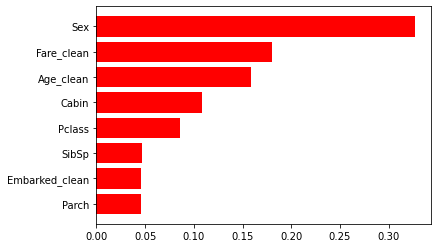

In [121]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [122]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_cleaned_original_features.pkl')

['C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_cleaned_original_features.pkl']

In [138]:
train_features = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_all.csv')
train_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_labels.csv')

In [139]:
train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_ind,Embarked_clean,Title,Family_cnt
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.483840,-0.446199,0.450064,-0.544166,0.545364,0.430223,-0.540385
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.046993,0.373863,0.450064,-0.544166,-0.334468,-1.784129,2.277639
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.594986,1.003414,0.450064,-0.544166,0.545364,0.430223,-0.540385
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.499672,-0.494025,0.450064,-0.544166,0.545364,-1.230541,0.023220
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.425203,-0.288093,0.450064,-0.544166,0.545364,-1.230541,-0.540385


<AxesSubplot:>

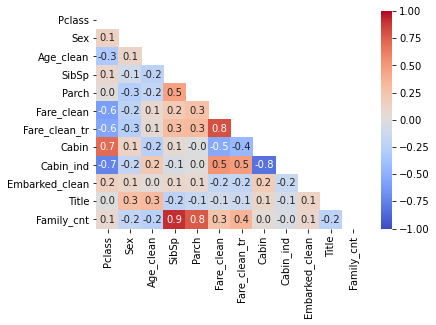

In [140]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [141]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 64}

0.777 (+/-0.141) for {'max_depth': 2, 'n_estimators': 8}
0.785 (+/-0.127) for {'max_depth': 2, 'n_estimators': 16}
0.794 (+/-0.093) for {'max_depth': 2, 'n_estimators': 32}
0.779 (+/-0.127) for {'max_depth': 2, 'n_estimators': 64}
0.785 (+/-0.125) for {'max_depth': 2, 'n_estimators': 128}
0.789 (+/-0.126) for {'max_depth': 2, 'n_estimators': 256}
0.792 (+/-0.118) for {'max_depth': 2, 'n_estimators': 512}
0.811 (+/-0.111) for {'max_depth': 4, 'n_estimators': 8}
0.813 (+/-0.097) for {'max_depth': 4, 'n_estimators': 16}
0.813 (+/-0.111) for {'max_depth': 4, 'n_estimators': 32}
0.826 (+/-0.075) for {'max_depth': 4, 'n_estimators': 64}
0.828 (+/-0.089) for {'max_depth': 4, 'n_estimators': 128}
0.828 (+/-0.095) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.104) for {'max_depth': 4, 'n_estimators': 512}
0.83 (+/-0.072) for {'max_depth': 8, 'n_estimators': 8}
0.817 (+/-0.049) for {'max_depth': 8, 'n_estimators': 16}
0.817 (+/-0.043) fo

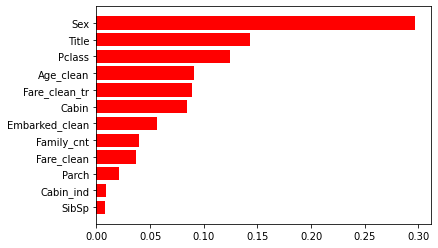

In [127]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [142]:
#We see sex is the strongest predictor
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_all_features.pkl')

['C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_all_features.pkl']

In [128]:
train_features = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_features_reduced.csv')
train_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//train_labels.csv')

<AxesSubplot:>

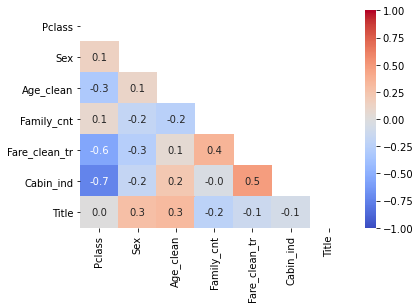

In [129]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [130]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 32}

0.803 (+/-0.11) for {'max_depth': 2, 'n_estimators': 8}
0.777 (+/-0.104) for {'max_depth': 2, 'n_estimators': 16}
0.79 (+/-0.123) for {'max_depth': 2, 'n_estimators': 32}
0.787 (+/-0.115) for {'max_depth': 2, 'n_estimators': 64}
0.796 (+/-0.118) for {'max_depth': 2, 'n_estimators': 128}
0.789 (+/-0.118) for {'max_depth': 2, 'n_estimators': 256}
0.789 (+/-0.118) for {'max_depth': 2, 'n_estimators': 512}
0.811 (+/-0.1) for {'max_depth': 4, 'n_estimators': 8}
0.822 (+/-0.11) for {'max_depth': 4, 'n_estimators': 16}
0.824 (+/-0.113) for {'max_depth': 4, 'n_estimators': 32}
0.815 (+/-0.117) for {'max_depth': 4, 'n_estimators': 64}
0.815 (+/-0.101) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.109) for {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-0.109) for {'max_depth': 4, 'n_estimators': 512}
0.818 (+/-0.06) for {'max_depth': 8, 'n_estimators': 8}
0.824 (+/-0.089) for {'max_depth': 8, 'n_estimators': 16}
0.817 (+/-0.097) for {'m

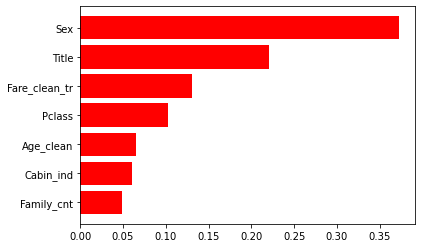

In [132]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [131]:
#We see sex is the strongest predictor
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_reduced_features.pkl')

['C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_reduced_features.pkl']

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [135]:
val_features_raw = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_raw.csv')
val_features_original = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_original.csv')
val_features_all = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_all.csv')
val_features_reduced = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_features_reduced.csv')

val_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//val_labels.csv')

val_features_raw.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-1.620987,-1.356623,0.031883,0.325139,-0.468427,1.047786,-1.239700,-2.010857
1,-1.620987,0.737125,1.273851,-0.464063,-0.468427,-0.078274,-2.070731,0.573494
2,0.803682,0.737125,0.031883,-0.464063,-0.468427,-0.463821,0.450064,-0.718682
3,-0.408652,-1.356623,-0.416075,0.325139,-0.468427,-0.124726,0.450064,0.573494
4,-0.408652,0.737125,0.527140,-0.464063,-0.468427,-0.368596,-1.128895,-2.010857


In [143]:
# Read in models
models = {}

for mdl in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//mdl_{}_features.pkl'.format(mdl))

In [146]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [147]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw_original'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_original, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.809 / Precision: 0.792 / Recall: 0.646 / Latency: 73.8ms
Cleaned Features -- 	Accuracy: 0.809 / Precision: 0.782 / Recall: 0.662 / Latency: 24.9ms
All Features -- 	Accuracy: 0.831 / Precision: 0.787 / Recall: 0.738 / Latency: 8.0ms
Reduced Features -- 	Accuracy: 0.803 / Precision: 0.8 / Recall: 0.615 / Latency: 5.0ms


In [150]:
#If latency is a very crucial factor, i would go with the model the reduced features, if not, then I would choose model with
#all features because it generates highest accuracy
# Read in our test features
test_features = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_features_all.csv')
test_labels = pd.read_csv('C://Personal//Linkedin Learning//Ex_Files_Applied_ML//Exercise Files//data//test_labels.csv')

In [151]:
# Evaluate our final model on the test set
evaluate_model('All Features', models['all'], test_features, test_labels)

All Features -- 	Accuracy: 0.804 / Precision: 0.815 / Recall: 0.697 / Latency: 16.0ms
